In [1]:
from automatic_differentiation import Variable
import automatic_differentiation as ad
import graphviz
import numpy as np

In [2]:
x = Variable('x')
x

Variable(name='x')

In [3]:
f = x + 1
f

Node(name='x + 1', operation='add', operands=('x', 1))

In [4]:
f.gradient_fn(1)

((Variable(name='x'), 1), (Constant(name='1', value=1), 1))

In [5]:
f.operands

(Variable(name='x'), Constant(name='1', value=1))

digraph {
  ordering=out;
  fontsize=15;
  labelloc=t;
  label="Computational graph";
  var_10d533760 [style=filled, shape=box, fillcolor=lavenderblush3, label="add", fontname=Courier];
  var_10d533760 -> var_10d533070;
  var_10d533760 -> var_10d533100;
  var_10d533070 [style=filled, shape=doublecircle, fillcolor=lightsteelblue, label="x", fontname=Courier];
  var_10d533100 [style=filled, shape=circle, fillcolor=ivory3, label="1", fontname=Courier];
}


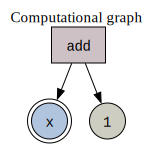

In [6]:
print(f.graph)
graphviz.Source(f.graph)

In [7]:
x = Variable('x')
y = Variable('y')
z = Variable('z')
f = ((x ** 2 + 1) - 1 / y) ** 3 + ad.log(z) - (x ** 2 + 1)
f

Node(name='(x ** 2 + 1 - 1 / y) ** 3 + log(z) - x ** 2 + 1', operation='subtract', operands=('(x ** 2 + 1 - 1 / y) ** 3 + log(z)', 'x ** 2 + 1'))

digraph {
  ordering=out;
  fontsize=15;
  labelloc=t;
  label="Computational graph";
  var_10d5577c0 [style=filled, shape=box, fillcolor=lavenderblush3, label="subtract", fontname=Courier];
  var_10d5577c0 -> var_10d557580;
  var_10d5577c0 -> var_10d54e8e0;
  var_10d557580 [style=filled, shape=box, fillcolor=lavenderblush3, label="add", fontname=Courier];
  var_10d557580 -> var_10d557370;
  var_10d557580 -> var_10d557430;
  var_10d557370 [style=filled, shape=box, fillcolor=lavenderblush3, label="power", fontname=Courier];
  var_10d557370 -> var_10d5571f0;
  var_10d557370 -> var_10d5572e0;
  var_10d5571f0 [style=filled, shape=box, fillcolor=lavenderblush3, label="subtract", fontname=Courier];
  var_10d5571f0 -> var_10d54e8e0;
  var_10d5571f0 -> var_10d557100;
  var_10d54e8e0 [style=filled, shape=box, fillcolor=lavenderblush3, label="add", fontname=Courier];
  var_10d54e8e0 -> var_10d54e1f0;
  var_10d54e8e0 -> var_10d54ef40;
  var_10d54e1f0 [style=filled, shape=box, fillcolor=lavenderbl

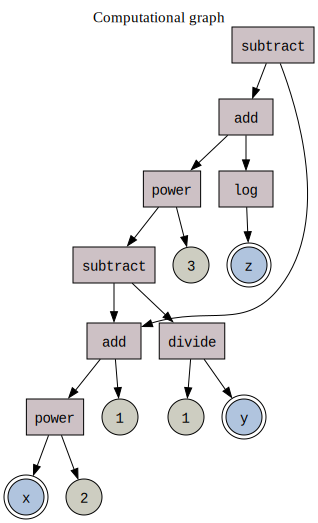

In [8]:
print(f.graph)
graphviz.Source(f.graph)

In [9]:
f.evaluate_at(x=2, y=3, z=4)

98.01592399074954

digraph {
  ordering=out;
  fontsize=15;
  labelloc=t;
  label="Computational graph";
  var_10d5577c0 [style=filled, shape=box, fillcolor=lavenderblush3, label="subtract", fontname=Courier];
  var_10d5577c0 -> var_10d557580;
  var_10d5577c0 -> var_10d54e8e0;
  var_10d557580 [style=filled, shape=box, fillcolor=lavenderblush3, label="add", fontname=Courier];
  var_10d557580 -> var_10d557370;
  var_10d557580 -> var_10d557430;
  var_10d557370 [style=filled, shape=box, fillcolor=lavenderblush3, label="power", fontname=Courier];
  var_10d557370 -> var_10d5571f0;
  var_10d557370 -> var_10d5572e0;
  var_10d5571f0 [style=filled, shape=box, fillcolor=lavenderblush3, label="subtract", fontname=Courier];
  var_10d5571f0 -> var_10d54e8e0;
  var_10d5571f0 -> var_10d557100;
  var_10d54e8e0 [style=filled, shape=box, fillcolor=lavenderblush3, label="add", fontname=Courier];
  var_10d54e8e0 -> var_10d54e1f0;
  var_10d54e8e0 -> var_10d54ef40;
  var_10d54e1f0 [style=filled, shape=box, fillcolor=lavenderbl

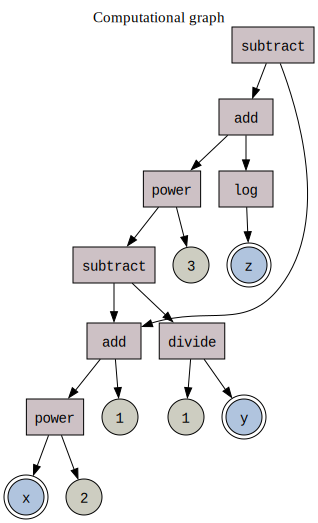

In [10]:
print(f.graph)
graphviz.Source(f.graph)

In [11]:
A = Variable('A')
B = Variable('B')
C = Variable('C')
formula = A @ B + C
print(f"f(A, B) = {formula}")
formula

f(A, B) = A @ B + C


Node(name='A @ B + C', operation='add', operands=('A @ B', 'C'))

In [12]:
A_val = np.diag([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
B_val = np.ones((10, 5))
C_val = np.random.randn(10, 5)

evaluation = formula.evaluate_at(A=A_val, B=B_val, C=C_val)
print(f"f(A, B) = \n{evaluation}")
evaluation

f(A, B) = 
[[-0.23560237  2.45943152  2.28005893  2.54704597  1.39203177]
 [ 1.72024787  4.15801558  2.3629043   2.01989454  2.64455941]
 [ 3.72875628  4.82339513  4.36353279  2.61830116  5.54126449]
 [ 3.1063065   2.6576745   5.11840509  5.76201239  4.0667234 ]
 [ 7.40597074  5.31085118  4.78939366  7.09900741  5.39009298]
 [ 6.75591772  6.08429372  5.10034079  4.70427637  7.14404737]
 [ 7.02880383  5.1119371   7.8305982   7.47719341  6.49486074]
 [ 8.76598248  7.54800286  8.20155704  7.88778457  8.30990533]
 [ 8.75903445 10.59473936  8.82605603 10.81481557  9.73438165]
 [ 8.66022213  8.85875332 10.80479422  9.76573538  9.12453654]]


array([[-0.23560237,  2.45943152,  2.28005893,  2.54704597,  1.39203177],
       [ 1.72024787,  4.15801558,  2.3629043 ,  2.01989454,  2.64455941],
       [ 3.72875628,  4.82339513,  4.36353279,  2.61830116,  5.54126449],
       [ 3.1063065 ,  2.6576745 ,  5.11840509,  5.76201239,  4.0667234 ],
       [ 7.40597074,  5.31085118,  4.78939366,  7.09900741,  5.39009298],
       [ 6.75591772,  6.08429372,  5.10034079,  4.70427637,  7.14404737],
       [ 7.02880383,  5.1119371 ,  7.8305982 ,  7.47719341,  6.49486074],
       [ 8.76598248,  7.54800286,  8.20155704,  7.88778457,  8.30990533],
       [ 8.75903445, 10.59473936,  8.82605603, 10.81481557,  9.73438165],
       [ 8.66022213,  8.85875332, 10.80479422,  9.76573538,  9.12453654]])

In [13]:
grads = formula.grads
print(f"df(A, B)/dA = \n{grads[A]}")
print(f"df(A, B)/dB = \n{grads[B]}")
print(f"df(A, B)/dC = \n{grads[C]}")

df(A, B)/dA = 
[[5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]]
df(A, B)/dB = 
[[ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.]
 [ 4.  4.  4.  4.  4.]
 [ 5.  5.  5.  5.  5.]
 [ 6.  6.  6.  6.  6.]
 [ 7.  7.  7.  7.  7.]
 [ 8.  8.  8.  8.  8.]
 [ 9.  9.  9.  9.  9.]
 [10. 10. 10. 10. 10.]]
df(A, B)/dC = 
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [14]:
print(formula.graph)
formula.graph

digraph {
  ordering=out;
  fontsize=15;
  labelloc=t;
  label="Computational graph";
  var_10d565430 [style=filled, shape=box, fillcolor=lavenderblush3, label="add", fontname=Courier];
  var_10d565430 -> var_10d565520;
  var_10d565430 -> var_10d5650a0;
  var_10d565520 [style=filled, shape=box, fillcolor=lavenderblush3, label="matmul", fontname=Courier];
  var_10d565520 -> var_10d565040;
  var_10d565520 -> var_10d557c70;
  var_10d565040 [style=filled, shape=doublecircle, fillcolor=lightsteelblue, label="A", fontname=Courier];
  var_10d557c70 [style=filled, shape=doublecircle, fillcolor=lightsteelblue, label="B", fontname=Courier];
  var_10d5650a0 [style=filled, shape=doublecircle, fillcolor=lightsteelblue, label="C", fontname=Courier];
}


'digraph {\n  ordering=out;\n  fontsize=15;\n  labelloc=t;\n  label="Computational graph";\n  var_10d565430 [style=filled, shape=box, fillcolor=lavenderblush3, label="add", fontname=Courier];\n  var_10d565430 -> var_10d565520;\n  var_10d565430 -> var_10d5650a0;\n  var_10d565520 [style=filled, shape=box, fillcolor=lavenderblush3, label="matmul", fontname=Courier];\n  var_10d565520 -> var_10d565040;\n  var_10d565520 -> var_10d557c70;\n  var_10d565040 [style=filled, shape=doublecircle, fillcolor=lightsteelblue, label="A", fontname=Courier];\n  var_10d557c70 [style=filled, shape=doublecircle, fillcolor=lightsteelblue, label="B", fontname=Courier];\n  var_10d5650a0 [style=filled, shape=doublecircle, fillcolor=lightsteelblue, label="C", fontname=Courier];\n}'

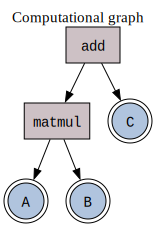

In [15]:
graphviz.Source(formula.graph)

In [16]:
more = formula + np.random.randn(10, 5)
more

Node(name='A @ B + C + ndarray⟨10×5⟩', operation='add', operands=('A @ B + C', ndarray⟨10×5⟩), value=ndarray⟨size=(10, 5), dtype=float64⟩)

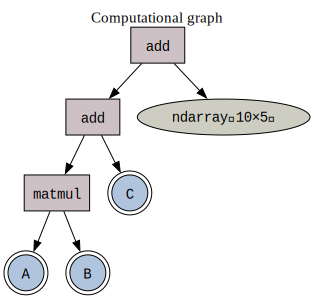

In [17]:
graphviz.Source(more.graph)

In [18]:
test = ad.einsum('ij,jk->ik', A, B)
test

Node(name='einsum(subscripts='ij,jk->ik', A, B)', operation='einsum', operands=('A', 'B'), value=ndarray⟨size=(10, 5), dtype=float64⟩)

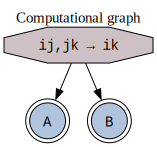

In [19]:
graphviz.Source(test.graph)

In [20]:
A_val = np.diag([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
B_val = np.ones((10, 5))

evaluation = test.evaluate_at(A=A_val, B=B_val)
print(f"f(A, B) = \n{evaluation}")
evaluation

f(A, B) = 
[[ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.]
 [ 4.  4.  4.  4.  4.]
 [ 5.  5.  5.  5.  5.]
 [ 6.  6.  6.  6.  6.]
 [ 7.  7.  7.  7.  7.]
 [ 8.  8.  8.  8.  8.]
 [ 9.  9.  9.  9.  9.]
 [10. 10. 10. 10. 10.]]


array([[ 1.,  1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.,  7.],
       [ 8.,  8.,  8.,  8.,  8.],
       [ 9.,  9.,  9.,  9.,  9.],
       [10., 10., 10., 10., 10.]])

In [21]:
grads = test.grads
print(f"df(A, B)/dA = \n{grads[A]}")
print(f"df(A, B)/dB = \n{grads[B]}")

df(A, B)/dA = 
[[5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]]
df(A, B)/dB = 
[[ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.]
 [ 4.  4.  4.  4.  4.]
 [ 5.  5.  5.  5.  5.]
 [ 6.  6.  6.  6.  6.]
 [ 7.  7.  7.  7.  7.]
 [ 8.  8.  8.  8.  8.]
 [ 9.  9.  9.  9.  9.]
 [10. 10. 10. 10. 10.]]


In [22]:
x = Variable('x')
y = Variable('y')
z = Variable('z')
formula = ad.einsum('ij, kl, mn -> mnij', x, y, z)

x_val = np.array([[1.0, -2.0], [5.0, 3.0]])
y_val = np.array([[3.0, 2.0], [-7.0, 4.0]])
z_val = np.array([[1.0, 0.0], [0.0, -1.0]])

result = formula.evaluate_at(x=x_val, y=y_val, z=z_val)
result

array([[[[  2.,  -4.],
         [ 10.,   6.]],

        [[  0.,   0.],
         [  0.,   0.]]],


       [[[  0.,   0.],
         [  0.,   0.]],

        [[ -2.,   4.],
         [-10.,  -6.]]]])

In [23]:
formula

Node(name='einsum(subscripts='ij,kl,mn->mnij', x, y, z)', operation='einsum', operands=('x', 'y', 'z'), value=ndarray⟨size=(2, 2, 2, 2), dtype=float64⟩)

In [24]:
x

Variable(name='x', value=ndarray⟨size=(2, 2), dtype=float64⟩)

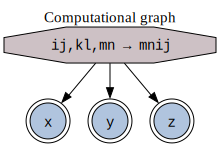

In [25]:
graphviz.Source(formula.graph)

In [26]:
x = Variable('x')
y = Variable('y')
z = Variable('z')
formula = (x ** 2 + y ** 3) * z - ad.einsum('ij, jk -> ik', x, y)
formula

Node(name='(x ** 2 + y ** 3) * z - einsum(subscripts='ij,jk->ik', x, y)', operation='subtract', operands=('(x ** 2 + y ** 3) * z', 'einsum(subscripts='ij,jk->ik', x, y)'))

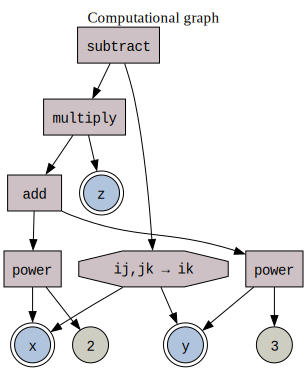

In [27]:
graphviz.Source(formula.graph)

In [28]:
x = Variable('x')
y = Variable('y')
f = x**2 + y**2

learning_rate = 0.1
iterations = 100
x_val = 3.0
y_val = 1.0
loss = f.evaluate_at(x=x_val, y=y_val)

# Perform gradient descent
for i in range(iterations):
    # Update variables using gradients
    gradients = f.evaluate_gradients_at(x=x_val, y=y_val)
    x_val -= learning_rate * gradients[x]
    y_val -= learning_rate * gradients[y]
    
    # Calculate the value of the function at this point
    loss = f.evaluate_at(x=x_val, y=y_val)

    print(f"Iteration {i + 1}: x = {x.value}, y = {y.value}, Loss = {loss}")

print(f"Optimal solution: x = {x.value}, y = {y.value}, Loss = {loss}")

Iteration 1: x = 2.4, y = 0.8, Loss = 6.4
Iteration 2: x = 1.92, y = 0.64, Loss = 4.096
Iteration 3: x = 1.536, y = 0.512, Loss = 2.62144
Iteration 4: x = 1.2288000000000001, y = 0.4096, Loss = 1.6777216000000001
Iteration 5: x = 0.9830400000000001, y = 0.32768, Loss = 1.0737418240000003
Iteration 6: x = 0.7864320000000001, y = 0.26214400000000004, Loss = 0.6871947673600002
Iteration 7: x = 0.6291456000000001, y = 0.20971520000000005, Loss = 0.4398046511104001
Iteration 8: x = 0.5033164800000001, y = 0.16777216000000003, Loss = 0.2814749767106561
Iteration 9: x = 0.40265318400000005, y = 0.13421772800000004, Loss = 0.1801439850948199
Iteration 10: x = 0.32212254720000005, y = 0.10737418240000003, Loss = 0.11529215046068474
Iteration 11: x = 0.25769803776000005, y = 0.08589934592000002, Loss = 0.07378697629483824
Iteration 12: x = 0.20615843020800004, y = 0.06871947673600001, Loss = 0.04722366482869647
Iteration 13: x = 0.16492674416640002, y = 0.05497558138880001, Loss = 0.030223145490

In [29]:
x = Variable('x')
y = Variable('y')
z = Variable('z')
formula = ad.einsum('ij, kl, mn -> mnij', x, y, z)

x_val = np.array([[1.0, -2.0], [5.0, 3.0]])
y_val = np.array([[3.0, 2.0], [-7.0, 4.0]])
z_val = np.array([[1.0, 0.0], [0.0, -1.0]])

result = formula.evaluate_gradients_at(x=x_val, y=y_val, z=z_val)
result

{Variable(name='z', value=ndarray⟨size=(2, 2), dtype=float64⟩): array([[14., 14.],
        [14., 14.]]),
 Variable(name='y', value=ndarray⟨size=(2, 2), dtype=float64⟩): array([[0., 0.],
        [0., 0.]]),
 Variable(name='x', value=ndarray⟨size=(2, 2), dtype=float64⟩): array([[0., 0.],
        [0., 0.]]),
 Node(name='einsum(subscripts='ij,kl,mn->mnij', x, y, z)', operation='einsum', operands=('x', 'y', 'z'), value=ndarray⟨size=(2, 2, 2, 2), dtype=float64⟩): array([[[[1., 1.],
          [1., 1.]],
 
         [[1., 1.],
          [1., 1.]]],
 
 
        [[[1., 1.],
          [1., 1.]],
 
         [[1., 1.],
          [1., 1.]]]])}

In [30]:
formula.grads

{Variable(name='z', value=ndarray⟨size=(2, 2), dtype=float64⟩): array([[14., 14.],
        [14., 14.]]),
 Variable(name='y', value=ndarray⟨size=(2, 2), dtype=float64⟩): array([[0., 0.],
        [0., 0.]]),
 Variable(name='x', value=ndarray⟨size=(2, 2), dtype=float64⟩): array([[0., 0.],
        [0., 0.]]),
 Node(name='einsum(subscripts='ij,kl,mn->mnij', x, y, z)', operation='einsum', operands=('x', 'y', 'z'), value=ndarray⟨size=(2, 2, 2, 2), dtype=float64⟩): array([[[[1., 1.],
          [1., 1.]],
 
         [[1., 1.],
          [1., 1.]]],
 
 
        [[[1., 1.],
          [1., 1.]],
 
         [[1., 1.],
          [1., 1.]]]])}